In [1]:
import pandas as pd

df = pd.read_csv("imdb_top_1000.csv")

print(df.head(1)) # the first lines
print(df.shape) # number of rows and columns
print(df.columns) # sütun isimleri (column names)
print(df.info())
print(
    "\n The number of missing values \n", df.isna().sum()
)
# non-null = no missing (empty) value at all

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   

               Series_Title Released_Year Certificate  Runtime  Genre  \
0  The Shawshank Redemption          1994           A  142 min  Drama   

   IMDB_Rating                                           Overview  Meta_score  \
0          9.3  Two imprisoned men bond over a number of years...        80.0   

         Director        Star1           Star2       Star3           Star4  \
0  Frank Darabont  Tim Robbins  Morgan Freeman  Bob Gunton  William Sadler   

   No_of_Votes       Gross  
0      2343110  28,341,469  
(1000, 16)
Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   

In [2]:
# DATA CLEANING AND PREPARATION STAGE (PANDAS)

df.columns = df.columns.str.strip() # Clear unnecessary gaps and format errors

# Fill missing values in the "Certificate" column with "unknown"
df["Certificate"] = df["Certificate"].fillna(
    "unknown"
)

# (NEW) Fill missing values with the median of the column
df["Meta_score"] = df["Meta_score"].fillna(
    df["Meta_score"].median() # is preferred not to be affected by outlier values (Meta_score = 0-100)
)

# (NEW) Convert the "Gross" column to numbers (remove commas, replace missing values with 0)
df["Gross"] = df["Gross"].fillna(
    df["Gross"].mode()[0] # fills missing values with the most common value of the column (en sık görülen değerle doldurur)
)
df["Gross"] = df["Gross"].astype(str).str.replace(",", "").astype(float) # Remove commas and convert to float

# object -> numeric and setting errors to NaN
df["Released_Year"] = pd.to_numeric( # Convert to numeric
    df["Released_Year"],
    errors="coerce" # If conversion fails, set as NaN
)

# Filling NaN's with the average
mean_year = df["Released_Year"].mean()
df["Released_Year"] = df["Released_Year"].fillna(
    mean_year
)

# numeric -> int
df.Released_Year = df.Released_Year.astype('int64')

# object -> category
colomuns = ["Certificate", "Genre"]
for i in colomuns:
    df[i] = df[i].astype("category")

# (NEW) object -> string -> int
df["Runtime"] = df["Runtime"].astype(str).str.replace(" min", "").astype('int64')

print(
    "\nAfter cleaning, data info:\n", df.dtypes
)
print(
    "\n The number of missing values \n", df.isna().sum()
)


After cleaning, data info:
 Poster_Link        object
Series_Title       object
Released_Year       int64
Certificate      category
Runtime             int64
Genre            category
IMDB_Rating       float64
Overview           object
Meta_score        float64
Director           object
Star1              object
Star2              object
Star3              object
Star4              object
No_of_Votes         int64
Gross             float64
dtype: object

 The number of missing values 
 Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


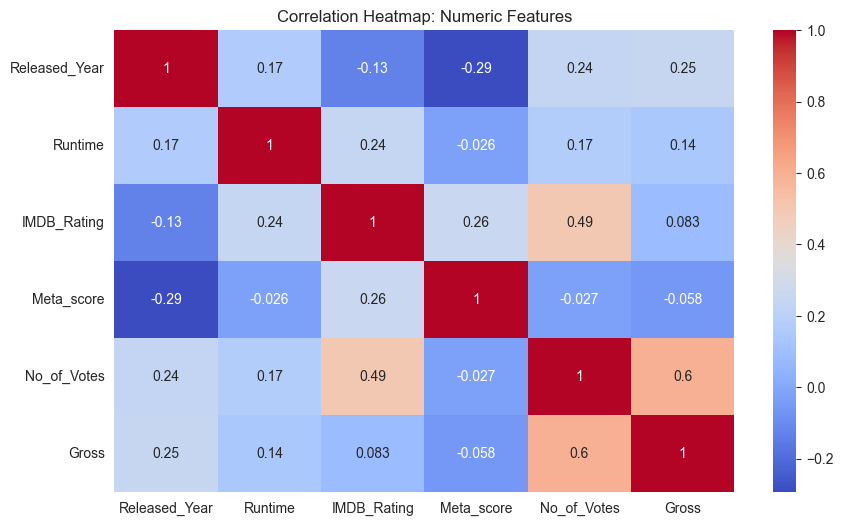

In [3]:
    # CORRELATION ANALYSIS (MATPLOTLIB & SEABORN)

import matplotlib.pyplot as plt
import seaborn as sns # Matplotlib üzerine kuruludur / yüksek seviyeli, daha az kodla profesyonel grafik üretir

numeric_columns = [
    'Released_Year',
    'Runtime',
    'IMDB_Rating',
    'Meta_score',
    'No_of_Votes',
    'Gross'
]
corr = df[
    numeric_columns
].corr( # hesaplama sonucu ortaya çıkan tabloyu saklayan bir değişken / ben tanımladım
    method="pearson" # sütunlar arasındaki korelasyon katsayısını hesaplar (Calculates the correlation coefficient between columns)
)
plt.figure(
    figsize=(10, 6)
)
sns.heatmap( # corr tablosunu ısı haritasına çevirir
    corr,
    annot=True, # her hücrenin içine rakam olarak korelasyon değerini yazar
    cmap="coolwarm" # renk paletini belirler
)
plt.title("Correlation Heatmap: Numeric Features")
plt.show()

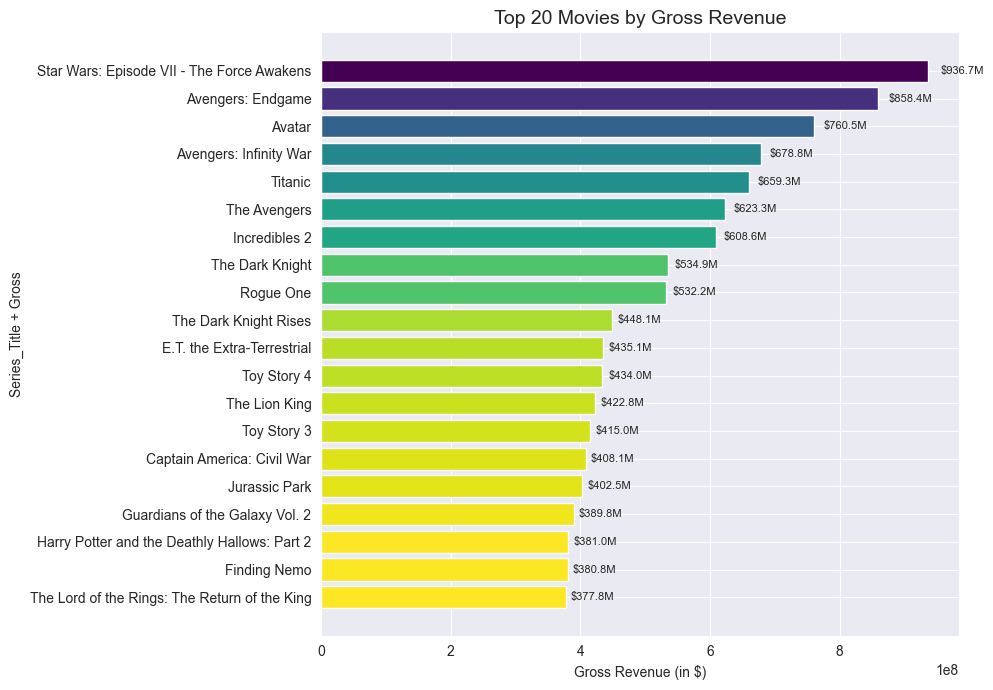

In [4]:
# TOP 20 MOVIES BY GROSS REVENUE VISUALIZATION

# Float -> numeric
df["Gross"] = pd.to_numeric(
    df["Gross"],
    errors="coerce"
)

# Top 20 films with highest gross (En yüksek hasılatlı ilk 20 film)
top20_gross = df.nlargest(20, "Gross")[["Series_Title", "Gross"]]

# Renkleri normalize etme / normalize Gross değerlerini 0-1 arasına ölçekler
norm = plt.Normalize(
    top20_gross["Gross"].min(),
    top20_gross["Gross"].max()
)
colors = plt.cm.viridis_r( # yüksek hasılatlı koyu, düşük hasılatlı açık renk olur.
    norm(
        top20_gross["Gross"].values
    )
)

# Grafik çizimi
plt.figure(
    figsize=(10, 7)
)
plt.barh( # horizontal bar chart
    top20_gross["Series_Title"],
    top20_gross["Gross"],
    color=colors
)

for i, (gross, title) in enumerate( # enumerate = (i, (gross, title))
    zip( # İki sütunu birleştirir
        top20_gross["Gross"],
        top20_gross["Series_Title"]
    )
):
    plt.text( # her çubuğun yanına hasılat metni ekler
        gross + gross * 0.02, # çubuğun sağına boşlukla yerleştir
        i, # hangi çubuk satırına yazılacağını belirler
        f"${gross/1e6:.1f}M", # sayıyı milyon dolar cinsinden biçimlendirir
        va="center", # yazıyı dikey olarak ortalar
        fontsize=8
    )

plt.gca().invert_yaxis()  # En yüksek en üstte gözükür
plt.title("Top 20 Movies by Gross Revenue", fontsize=14)
plt.xlabel("Gross Revenue (in $)")
plt.ylabel("Series_Title + Gross")
plt.tight_layout() # başlık veya etiketler sığması için grafiği sıkıştırarak düzgün hizalar
plt.show()

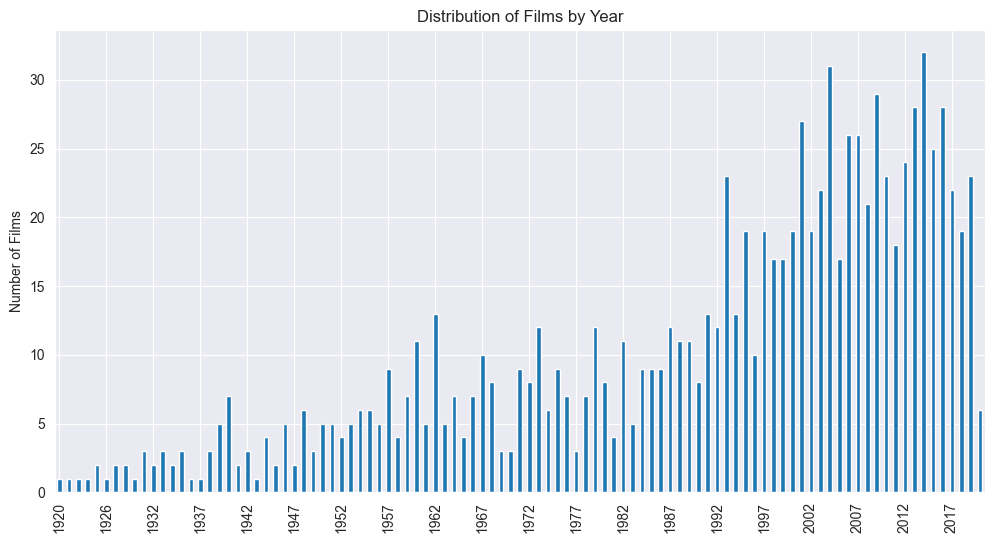


Years With Most Films:
 2014    32
2004    31


In [5]:
# Distribution of films by year with bar chart
df2 = df.groupby("Released_Year").size() # Count number of films per year
df2.plot(
    kind="bar", # Çubuk grafik (bar chart)
    figsize=(12, 6)
)
plt.xticks( # Set x-ticks to show every 5th year
    range(
        0, len(df2), 5
    ),
    df2.index[::5] # Show every 5th year
)
plt.xlabel(
    None
)
plt.ylabel(
    "Number of Films"
)
plt.title(
    "Distribution of Films by Year"
)
plt.show()
print(
    "\nYears With Most Films:\n",
    df2.nlargest(2). # nlargest() = returns the largest (n) values / en büyük 2 yılı verir
    rename_axis(None). # İndeks adını kaldırma
    to_string()
)

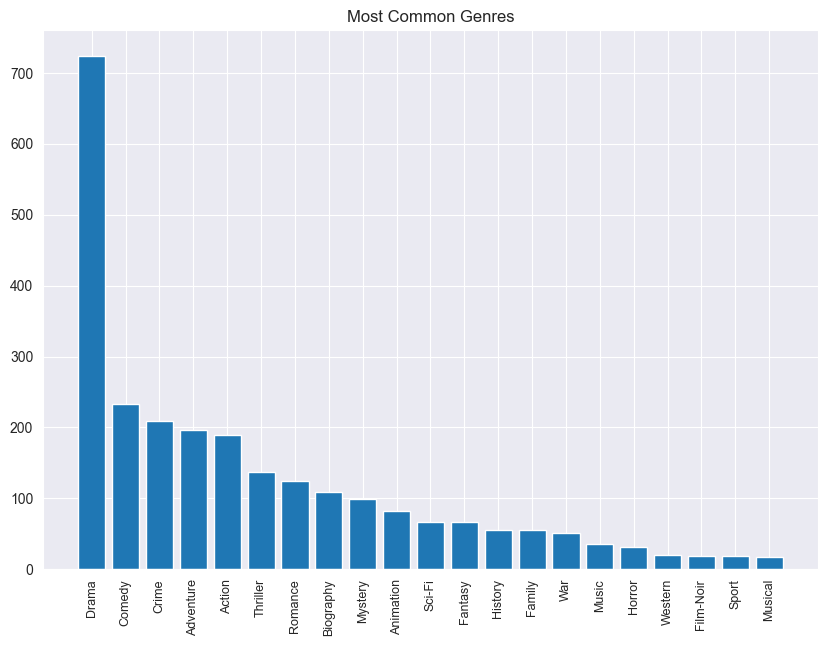

In [6]:
# Most Common Genres
s = (
    df["Genre"].dropna(). # dropna() = remove missing values
    str.split(", "). # türleri virgül ile ayırır
    explode() #  her türü ayrı bir satırda gösterir
)
genres = s.value_counts().to_dict() # türlerin sayısını sayar ve sözlüğe çevirir
plt.figure(
    figsize=(10,7)
)
plt.bar(
    genres.keys(), # tür isimleri
    genres.values() # tür sayıları
)
plt.xticks(
    rotation=90, fontsize=9 # x eksenindeki yazıları 90 derece döndürme
)
plt.title(
    "Most Common Genres"
)
plt.show()

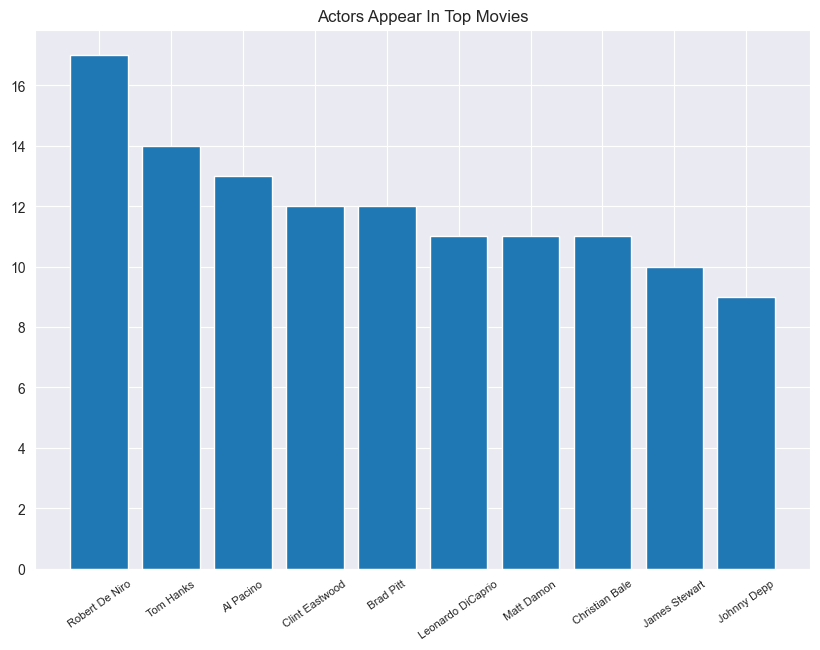

In [7]:
# Actors Appear In Top Movies
columns = [
    "Star1", "Star2", "Star3", "Star4"
]
s = (df[columns].stack(). # stack() = sütunları satırlara dönüştürür
     str.strip()) # strip() = önde ve sonda boşlukları temizler
stars = s.value_counts().head(10).to_dict() # en çok oynayan 10 aktörün sayısını sayar ve sözlüğe çevirir
plt.figure(
    figsize=(10,7)
)
plt.bar(
    stars.keys(),
    stars.values()
)
plt.xticks(
    rotation=35, fontsize=8
)
plt.title(
    "Actors Appear In Top Movies"
)
plt.show()

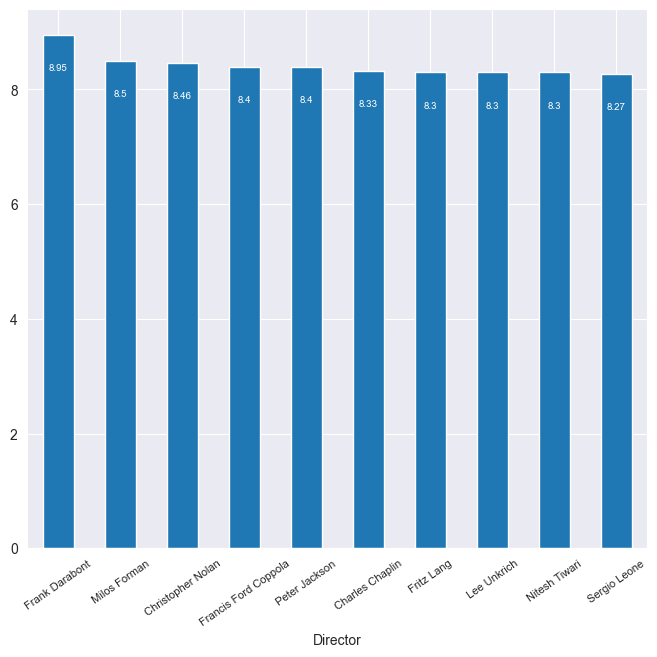

In [8]:
# Directors With The Highest Average on IMDB

df2 = df.Director.value_counts() # Yönetmenlerin film sayısını sayar (Counts number of films directors)
df2 = df2[ # sadece birden fazla filmi olan yönetmenleri alır (only directors with multiple films)
    df.Director.value_counts() > 1
].index

df2 = df[ #
    df.Director.isin(df2) # isin() = filtreleme işlemi yapar (making a filter)
].groupby( # yönetmenlere göre gruplar
    "Director",
    observed=True # kategorik veriyle çalışırken gereksiz grupların oluşmasını engeller, daha hızlı, temiz sonuçlar elde edilir
)[
    "IMDB_Rating"
].mean().round(2).nlargest(10) # round(2) = virgülden sonra 2 basamak gösterir

ax = df2.plot( # ax'a atayarak grafikle oynanabilir (ax.text() ile çubukların üzerine değer yazmak gibi)
    kind = "bar",
    figsize=(8,7)
)
plt.xticks(rotation=35, fontsize=8)
for i, value in enumerate(df2): # çubukların üzerine değer yazmak için / enumerate() = index ve value döner
    ax.text(
        i, value - 0.5, # value - 0.5 ile değeri çubuğun biraz altına yazdırır
        str(value), # değeri stringe çevirir
        ha = "center", # horizontal alignment
        fontsize = 7,
        va = "top", # vertical alignment
        color = "white"
    )
plt.show()


 Doğruluk Oranı (Accuracy):  0.34

Sınıflandırma Raporu (Classification Report): 
               precision    recall  f1-score   support

      Action       0.45      0.48      0.47        29
   Adventure       0.14      0.07      0.10        14
   Animation       0.67      0.40      0.50        20
   Biography       0.50      0.10      0.16        21
      Comedy       0.26      0.37      0.30        30
       Crime       0.00      0.00      0.00        16
       Drama       0.35      0.51      0.42        63
     Fantasy       0.00      0.00      0.00         1
   Film-Noir       0.00      0.00      0.00         1
      Horror       0.00      0.00      0.00         1
     Mystery       0.00      0.00      0.00         4

    accuracy                           0.34       200
   macro avg       0.22      0.17      0.18       200
weighted avg       0.34      0.34      0.32       200



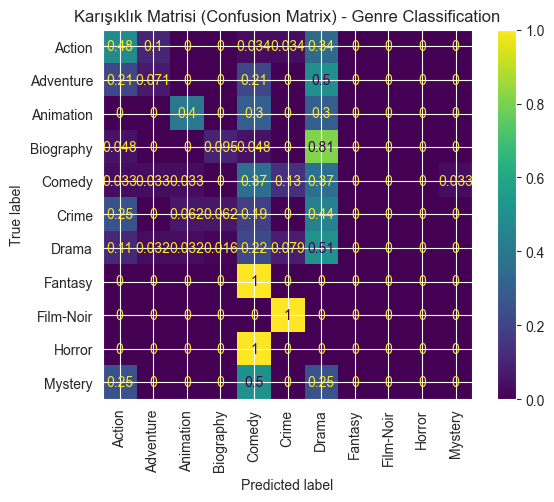

In [9]:
# GENRE CLASSIFICATION WITH SCIKIT-LEARN

y = df["Genre"] # hedef sutun (target column)
x = df[ # tahmin için faydalı sutunlar (features)
    [
        "IMDB_Rating", "Meta_score", "Gross", "Runtime", "Released_Year"
    ]
]
y = y.str.split(",").str[0].str.strip() # sadece ilk türü alır ve boşlukları temizler

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( # veriyi eğitim ve test olarak ayırır
    x, y,
    test_size=0.2, # %20 test verisi
    random_state=42, # veri bölmenin her seferinde aynı şekilde gerçekleşmesini ve sonuçların tekrarlanabilir olmasını sağlar
)

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Eksik verileri doldurma (ortalama ile)
imputer = SimpleImputer(
    strategy="mean" # eksik değerleri ortalama ile doldurur
)
x_train = imputer.fit_transform( # fit_transform() = eğitim verisinin ortalamasını öğrenip doldurur
    x_train
)
x_test = imputer.transform( # imputer = eksik (NaN) değerleri belirli bir stratejiye göre doldurur
    x_test
)

# Ölçekleme (Standardization) = tüm özellikleri eşit şekilde değerlendirmesi için
scaler = StandardScaler()
x_train = scaler.fit_transform(
    x_train
)
x_test = scaler.transform(
    x_test
)

# Model Kurulumu ve Eğitimi (Model Installation and Training)
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier  # ensemble =
model = RandomForestClassifier(
    n_estimators=100, # modelin kullanacağı bağımsız karar ağacı sayısı
    # 100 verildiğinde eğitim süresi makul kalır, modelin doğruluğu yeterli olur
    random_state=42
)
model.fit(
    x_train,
    y_train
)

# Tahmin ve Doğruluk Oranına Bakma (Check Prediction and Accuracy Rate)
from sklearn.metrics import accuracy_score, classification_report # accuracy_score = Doğruluk oranı hesaplamak için
# classification_report = Sınıflandırmanın ayrıntılı raporunu almak için

y_pred = model.predict(
    x_test
)
print(
    "\n Doğruluk Oranı (Accuracy): ", round(
        accuracy_score(y_test, y_pred), 3 # gerçek etiketler (y_test) modelin tahminleri (y_pred) ne kadar örtüştüğünü oransal olarak bulur

    )
)
print(
    "\nSınıflandırma Raporu (Classification Report): \n", classification_report(
        y_test, y_pred,
        zero_division=0
    )
)

# Karışıklık Matrisi (Confusion Matrix)
from sklearn.metrics import ConfusionMatrixDisplay # karışıklık matrisi (confusion matrix) için hazır bir görselleştirme aracı
ConfusionMatrixDisplay.from_estimator(
    model,
    x_test,
    y_test,
    normalize='true', # 1.0, 0.9, 0.8 → büyük kısmı doğru tahmin edilmiş / 0.0, 0.1 → Model doğru tahmin edememiş
    xticks_rotation=90
)
plt.title(
    "Karışıklık Matrisi (Confusion Matrix) - Genre Classification"
)
plt.show() # the film belongs to more than one genre that's why accurancy rate is low


Model Performance:

              precision    recall  f1-score   support

           0       0.65      0.70      0.68        77
           1       0.56      0.50      0.53        58

    accuracy                           0.61       135
   macro avg       0.60      0.60      0.60       135
weighted avg       0.61      0.61      0.61       135



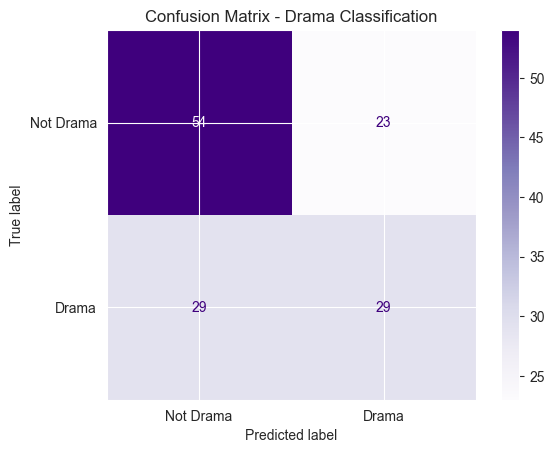

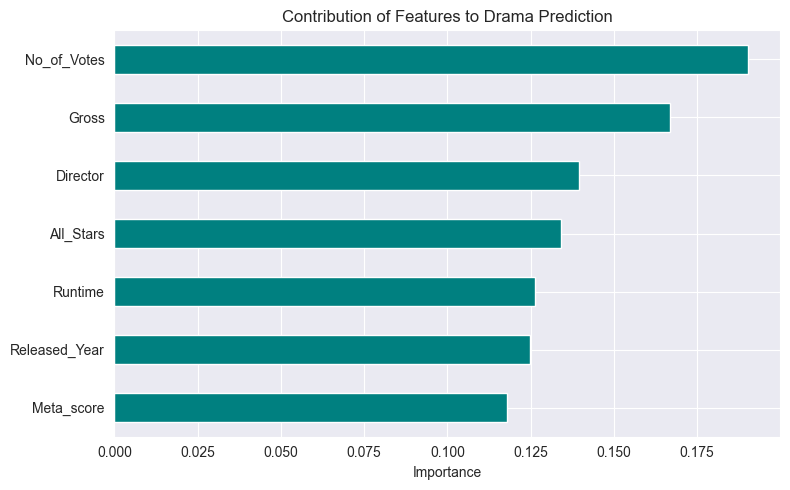

In [10]:
# CLASSIFIER TO PREDICT DRAMA OR NOT (RandomForestClassifier MODEL)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get only first type from Genre (sadece ilk türü aldım)
df["Main_Genre"] = df["Genre"].str.split(",").str[0].str.strip()
df_filtered = df[
    ~df["Main_Genre"].isin(
        [
            "Action", "Comedy"
        ]
    )
].copy() # pandas’ın “chained assignment” uyarılarını önlemek içim / df_filtered üzerindeki değişiklikler orijinal DataFrame’den bağımsızdır

# Creating new column named "IsDrama" / takes binary value(1 if Drama, 0 otherwise)
df_filtered["IsDrama"] = df_filtered["Main_Genre"].apply(
    lambda x: 1
    if x == "Drama"
    else 0
)

features = [
    "Runtime", "Meta_score", "No_of_Votes", "Gross", "Released_Year", "Director"
]

X = df_filtered[features].copy()
y = df_filtered["IsDrama"]

# Star 1 2 3 4 -> All_Stars
X["All_Stars"] = df_filtered[
    [
        "Star1","Star2","Star3","Star4"
    ]
].agg( # satır veya sütunda toplu işlem yapar
    ", ".join, # 4 hücreyi virgülle birleştirip tek bir string yapar
    axis=1 # axis=1 her satırdaki Star1–4 değerleri alınır)
)

# Numeric and Categorical Columns
numeric_cols = [
    "Gross", "Meta_score", "Runtime", "No_of_Votes", "Released_Year"
]
cat_cols = [
    "Director", "All_Stars"
]

# Encode Categorical Columns (For Machine Learning to Process String Data)
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Split Data Train and Test
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # %20 test verisi (test kümesi 200 örnek olur)
    random_state=42, # veri bölmenin her seferinde aynı şekilde gerçekleşmesini ve sonuçların tekrarlanabilir olmasını sağlar
    stratify=y # divide data by supporting class balance (Dengesiz veriyle yanlış öğrenmeyi önler)
)

# Random Forest Model
model = RandomForestClassifier(
    n_estimators=200, # kullanılacak bağımsız karar ağacı sayısı
    max_depth=8, # Ağaç Derinliği / 6–10 Küçük ve orta boylar için ideal
    random_state=42,
    class_weight="balanced"  # sınıf dengesizliği için
)
model.fit(x_train, y_train)

# Model Rating
y_pred = model.predict(x_test)
print("\nModel Performance:\n")
print(
    classification_report(
        y_test,
        y_pred,
        digits=2 # iki basamaklı yazdırır 0.1234 -> 0.12
    )
)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Not Drama", "Drama"]
)
disp.plot(cmap="Purples")
plt.title("Confusion Matrix - Drama Classification")
plt.show()

# Feature Importance Visualization
features_final = [
    "Runtime", "Meta_score", "No_of_Votes", "Gross", "Released_Year", "Director", "All_Stars"
]
importances = pd.Series(
    model.feature_importances_,
    index=features_final
)
importances.sort_values(ascending=True).plot.barh(figsize=(8, 5), color="teal")
plt.title("Contribution of Features to Drama Prediction")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


Model Performance:

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        77
           1       0.58      0.59      0.58        58

    accuracy                           0.64       135
   macro avg       0.63      0.63      0.63       135
weighted avg       0.64      0.64      0.64       135



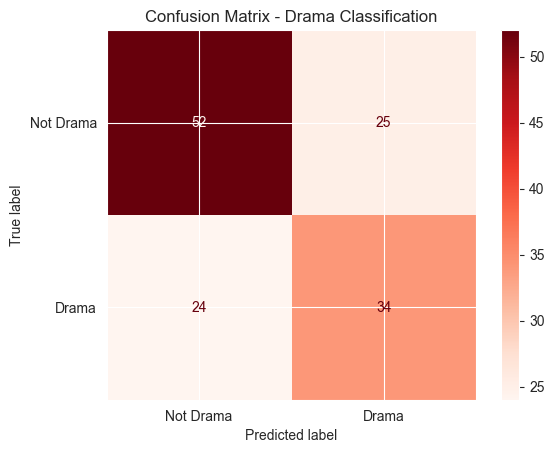

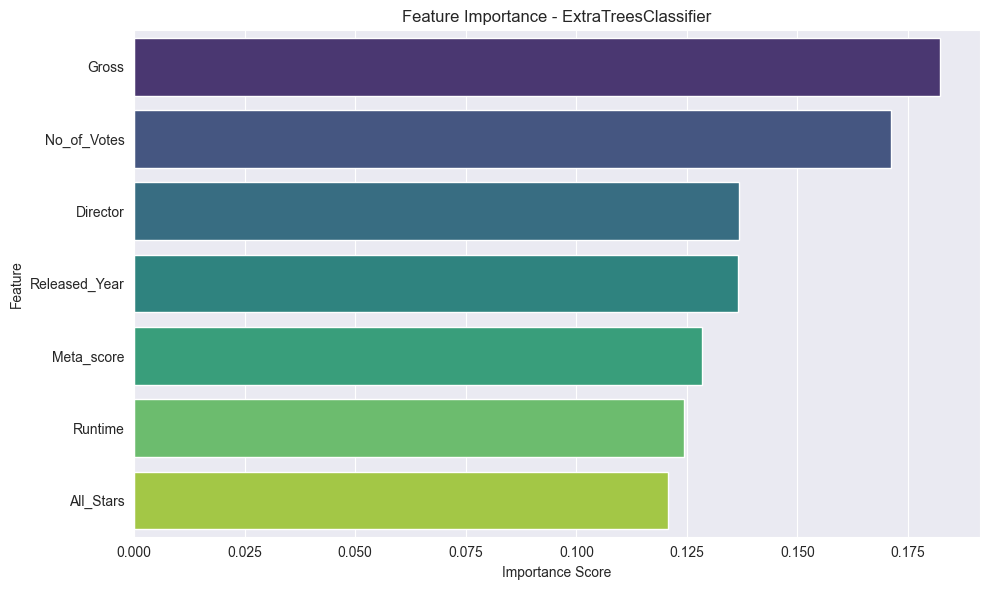

In [11]:
# CLASSIFIER TO PREDICT DRAMA OR NOT (PANDAS, MATPLOTLIB, SEABORN, SCIKIT-LEARN)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get only first type from Genre (sadece ilk türü aldım)
df["Main_Genre"] = df["Genre"].str.split(",").str[0].str.strip()
df_filtered = df[
    ~df["Main_Genre"].isin(
        [
            "Action", "Comedy"
        ]
    )
].copy() # pandas’ın “chained assignment” uyarılarını önlemek içim / df_filtered üzerindeki değişiklikler orijinal DataFrame’den bağımsızdır

# Creating new column named "IsDrama" / takes binary value(1 if Drama, 0 otherwise)
df_filtered["IsDrama"] = df_filtered["Main_Genre"].apply(
    lambda x: 1
    if x == "Drama"
    else 0
)

features = [
    "Runtime", "Meta_score", "No_of_Votes", "Gross", "Released_Year", "Director"
]
X = df_filtered[features].copy()
y = df_filtered["IsDrama"]

# Star 1 2 3 4 -> All_Stars (combined)
X["All_Stars"] = df_filtered[
    [
        "Star1","Star2","Star3","Star4"
    ]
].agg( # satır veya sütunda toplu işlem yapar
    ", ".join, # 4 hücreyi virgülle birleştirip tek bir string yapar
    axis=1 # axis=1 her satırdaki Star1–4 değerleri alınır)
)

# Numeric and Categorical Columns
numeric_cols = [
    "Gross", "Meta_score", "Runtime", "No_of_Votes", "Released_Year"
]
cat_cols = [
    "Director", "All_Stars"
]

# Encode Categorical Columns (For Machine Learning to Process String Data)
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Split Data Train and Test
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # %20 test verisi (test kümesi 200 örnek olur)
    random_state=42, # veri bölmenin her seferinde aynı şekilde gerçekleşmesini ve sonuçların tekrarlanabilir olmasını sağlar
    stratify=y # divide data by supporting class balance (Dengesiz veriyle yanlış öğrenmeyi önler)
)

# ExtraTreesClassifier Model
model = ExtraTreesClassifier( # Random Forest’a benzer, ikisi de birden fazla karar ağacını birleştirerek tahmin yapar / bunun farkı ağaçları daha rastgele kurmasıdır / Avantaj: Overfitting riskini azaltır / Hızlı çalışır / sınıflandırma, regresyon için kullanılabilir
    n_estimators=300, # ağaç sayısı
    max_depth=10, # Her ağacın maksimum derinliği, overfitting’i sınırlar
    max_features="sqrt", # her bölmede rastgele feature kullanır daha fazla çeşitlilik sağlar
    random_state=42,
    class_weight="balanced"
)
model.fit(x_train, y_train)

# Model Rating
y_pred = model.predict(x_test)
print("\nModel Performance:\n")
print(
    classification_report(
        y_test,
        y_pred,
        digits=2 # iki basamaklı yazdırır 0.1234 -> 0.12
    )
)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Not Drama", "Drama"]
)
disp.plot(cmap="Reds")
plt.title("Confusion Matrix - Drama Classification")
plt.show()

# Feature Importance Visualization
feature_importances = pd.DataFrame(
    {
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }
).sort_values(
    by='Importance',
    ascending=False # büyükten küçüğe sıralama yapar
)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importances,
    hue='Feature',
    palette="viridis",
    dodge=False,
    legend=False
)
plt.title("Feature Importance - ExtraTreesClassifier")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()